# Data Exploration

Perform Data Exploration on the Consolidated Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

%matplotlib inline

In [2]:
path_df = "./Pickles/all_articles_raw.pickle"

with open(path_df, 'rb') as data:
    articles = pickle.load(data)

## News Source

In [3]:
articles.head()

,source,title,article,category
0,The Straits Times,"Sales for Handmaid's Tale sequel top 125,000 c...",\nNEW YORK (AP) - Sales for Margaret Atwood's ...,Lifestyle
1,The Straits Times,R. Kelly a no-show in court on Minnesota solic...,\nMINNEAPOLIS (AP) - Singer R. Kelly was a no-...,Lifestyle
2,The Straits Times,HK director Derek Tsang picks forest in Japan ...,"\nSoul Mate director Derek Tsang, 39, is known...",Lifestyle
3,The Straits Times,"Tony Hadley, ex-frontman of Spandau Ballet, to...",\nSINGAPORE - The voice behind Spandau Ballet ...,Lifestyle
4,The Straits Times,South Korean actor Sung Hoon holding meet-and-...,\nSINGAPORE - South Korean heart-throb Sung Ho...,Lifestyle


In [4]:
len(articles)

10919

Text(0.5, 1.0, 'News Source')

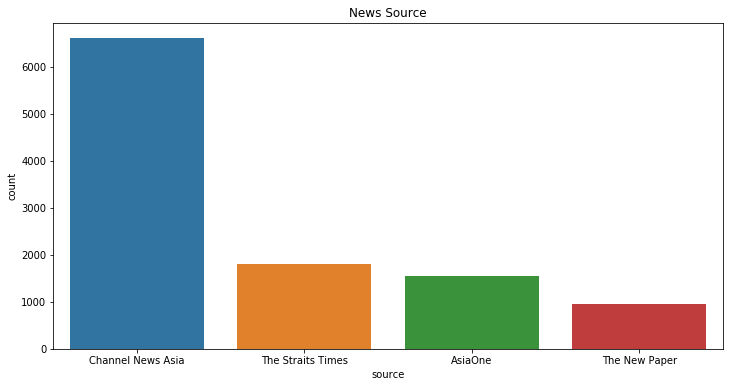

In [5]:
plt.figure(figsize=(12,6))
sns.countplot(x='source',data=articles,order=articles['source'].value_counts().iloc[:10].index,).set_title("News Source")

In [6]:
articles['source'].value_counts()

Channel News Asia    6612
The Straits Times    1810
AsiaOne              1541
The New Paper         956
Name: source, dtype: int64

## Article Categories

Text(0.5, 1.0, 'Categories')

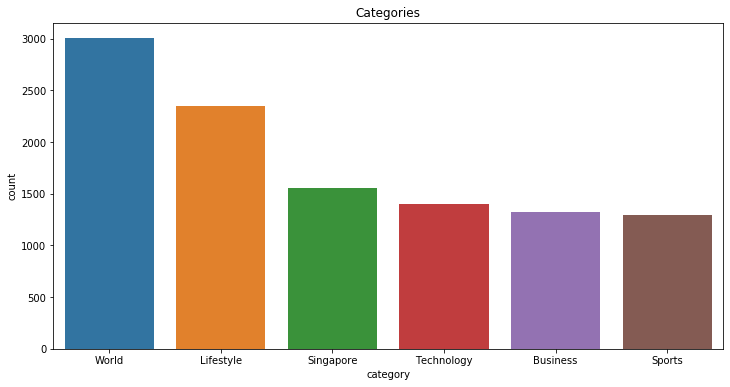

In [7]:
plt.figure(figsize=(12,6))
sns.countplot(x='category',data=articles,order=articles['category'].value_counts().iloc[:10].index,).set_title("Categories")

In [8]:
articles['category'].value_counts()

World         3005
Lifestyle     2347
Singapore     1552
Technology    1400
Business      1323
Sports        1292
Name: category, dtype: int64

In [9]:
all_categories= articles['category'].unique()
all_categories

array(['Lifestyle', 'World', 'Technology', 'Business', 'Singapore',
       'Sports'], dtype=object)

In [10]:
sampled_data =[]
for category in all_categories:
    df = articles[articles['category']==category].sample(n=1000)
    sampled_data.append(df)

In [11]:
all_articles = pd.concat(sampled_data)
all_articles.head()

,source,title,article,category
619,The Straits Times,"Myth, magic and memoirs at storytelling festival",\nSINGAPORE - From the complicated life story ...,Lifestyle
2852,AsiaOne,Beyond the ski slopes: Why the wealthy have ey...,"It's a hot, sunny day, and I'm looking out at ...",Lifestyle
958,The Straits Times,Critics gush over the spectacle and story of A...,"\nLOS ANGELES, UNITED STATES (REUTERS) - Film ...",Lifestyle
3058,AsiaOne,Spaces we love: Singaporean homes washed in na...,"If you want a home bathed in light, there are ...",Lifestyle
5954,Channel News Asia,NaN,Amid colossal portraits and clean lines of bla...,Lifestyle


In [12]:
all_articles['category'].value_counts()

World         1000
Business      1000
Technology    1000
Singapore     1000
Sports        1000
Lifestyle     1000
Name: category, dtype: int64

## Article Length

In [13]:
all_articles['length_characters'] = all_articles['article'].apply(len)
all_articles['length_words']=all_articles['article'].str.split().str.len()
all_articles.head()

,source,title,article,category,length_characters,length_words
619,The Straits Times,"Myth, magic and memoirs at storytelling festival",\nSINGAPORE - From the complicated life story ...,Lifestyle,3603,589
2852,AsiaOne,Beyond the ski slopes: Why the wealthy have ey...,"It's a hot, sunny day, and I'm looking out at ...",Lifestyle,9642,1500
958,The Straits Times,Critics gush over the spectacle and story of A...,"\nLOS ANGELES, UNITED STATES (REUTERS) - Film ...",Lifestyle,2390,374
3058,AsiaOne,Spaces we love: Singaporean homes washed in na...,"If you want a home bathed in light, there are ...",Lifestyle,1645,286
5954,Channel News Asia,NaN,Amid colossal portraits and clean lines of bla...,Lifestyle,1985,300


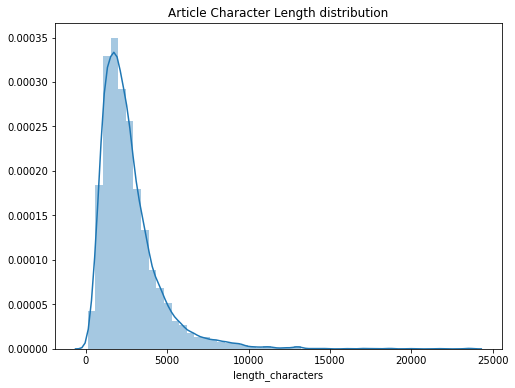

In [14]:
plt.figure(figsize=(8,6))
sns.distplot(all_articles['length_characters']).set_title('Article Character Length distribution');

In [15]:
all_articles['length_characters'].describe()

count     6000.000000
mean      2679.103000
std       1888.825415
min        111.000000
25%       1484.000000
50%       2235.000000
75%       3294.500000
max      23548.000000
Name: length_characters, dtype: float64

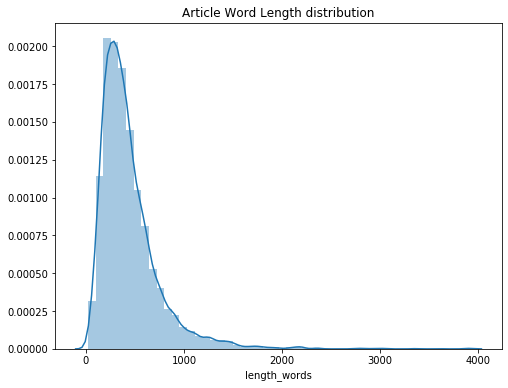

In [16]:
plt.figure(figsize=(8,6))
sns.distplot(all_articles['length_words']).set_title('Article Word Length distribution');

In [17]:
all_articles['length_words'].describe()

count    6000.000000
mean      441.378333
std       312.157835
min        21.000000
25%       242.000000
50%       367.000000
75%       547.000000
max      3908.000000
Name: length_words, dtype: float64

### Longest Article

In [18]:
all_articles[all_articles['length_words']==5350]

,source,title,article,category,length_characters,length_words


### Shortest Article

In [19]:
liverpool = all_articles[all_articles['length_words']==21]

In [20]:
liverpool['article']

8232    KUALA LUMPUR: The first image of a black hole ...
Name: article, dtype: object

### Article Length by Category

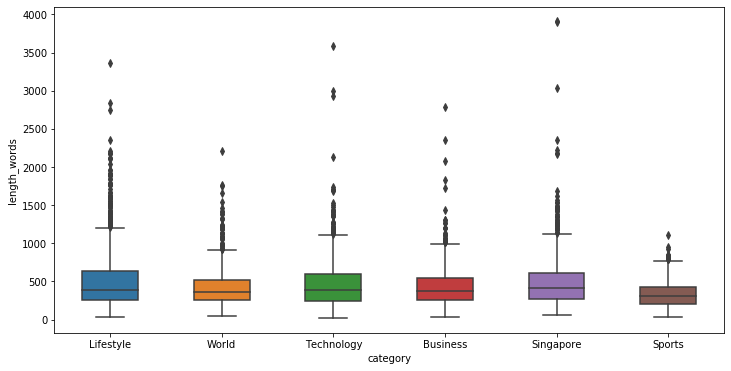

In [21]:
plt.figure(figsize=(12,6))
sns.boxplot(data=all_articles, x='category', y='length_words', width=.5);

In [22]:
all_articles.groupby('category')['length_words'].describe()

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Business,1000.0,427.343,262.458892,35.0,254.50,378.0,550.25,2783.0
Lifestyle,1000.0,522.596,416.101427,39.0,250.75,381.5,634.25,3361.0
Singapore,1000.0,497.289,357.320637,61.0,275.00,409.0,616.25,3908.0
Sports,1000.0,331.576,166.362907,40.0,199.75,305.0,430.25,1107.0
Technology,1000.0,454.584,325.689636,21.0,245.00,386.0,592.00,3586.0
World,1000.0,414.882,242.516284,42.0,255.00,362.0,518.75,2211.0


In [23]:
#Export to Serialized Object
with open('Pickles/sampled_articles_raw.pickle', 'wb') as output:
    pickle.dump(all_articles, output)